# Clustering

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import acquire
import wrangle_mall
import os
from env import host, username, password

<div class="alert alert-block alert-success">
<b>Takeaways:</b>
    <br>

# Data Wrangling

In [2]:
def acquire_mall_customers():
    
    if os.path.isfile('mall_customers.csv'):
        
        df = pd.read_csv('mall_customers.csv')
        df = df.drop(columns='Unnamed: 0')

        return df

    else:
        
        url = get_connection('mall_customers')
        query = '''
                 SELECT *
                 FROM customers;
                 '''
        df = pd.read_sql(query, url)                
        df.to_csv('mall_customers.csv')

        return df

In [27]:
df = acquire.acquire_mall_customers()

In [28]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

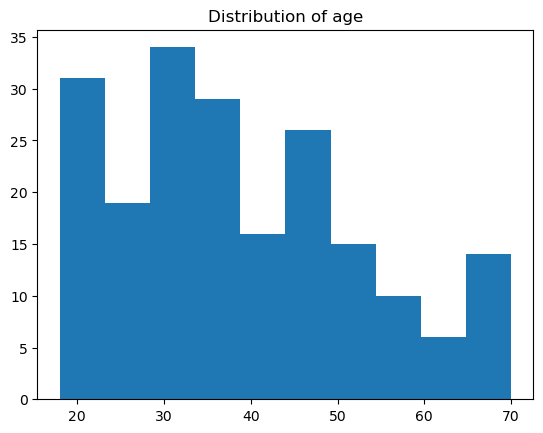

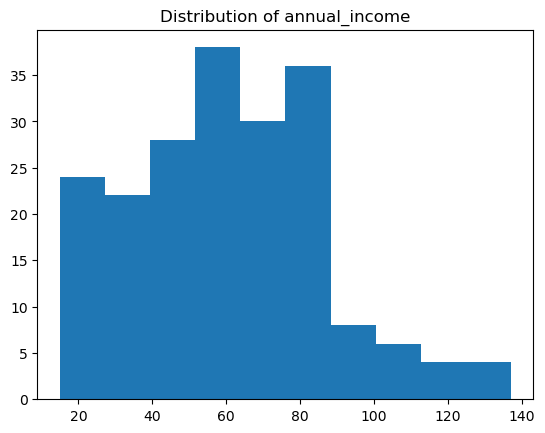

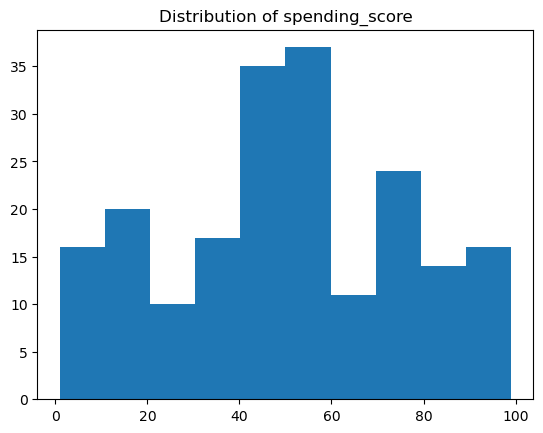

In [11]:
num_cols = ['age', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
def upper_outlier_detector(df, col, k):
    
    q1, q3 = df[col].quantile([.25, .75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    return np.where(df[col] > upper_bound, 1, 0)

In [21]:
my_list = ['age', 'annual_income']

for col in df:
    
    df[f'{col}_upper_outliers'] = upper_outlier_detector(df, col, 1.5)
    
df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [22]:
df[['age_upper_outliers', 'annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [25]:
df[df['annual_income_upper_outliers'] == 1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [26]:
df['annual_income'].mean()

60.56

# Exploring

- Build visuals to help us know what questions to ask.

- Identify trends in the data.

- Gain understanding of the topic and business industry 

- Help construct a story for the data

- Visualize the character of your data, for example normality

- Prioritize features, learn which ones may have the most influence

- Identify shortcomings in the data

- Learn ways to combine features

- Guide the recommendations shared with others 

## Questions about the mall dataset?

- Which gender has a higher spending score?

- Age and income; does income increase with age?

- Which gender has a higher annual income?

- Are annual income and spending score correlated?



In [34]:
train, validate, test = wrangle_mall.wrangle_mall_df()

(118, 6) (40, 6) (40, 6)


<AxesSubplot:xlabel='gender_Male', ylabel='spending_score'>

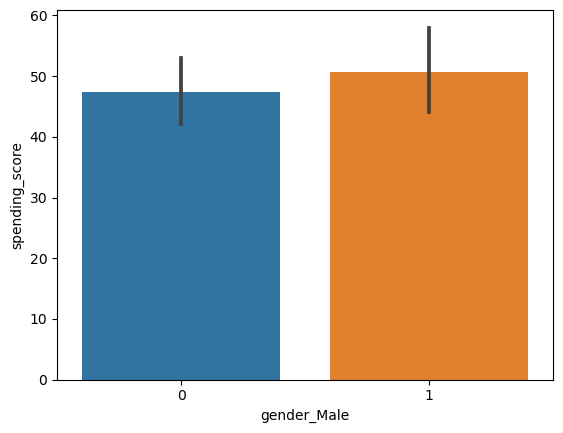

In [37]:
sns.barplot(data=train, x='gender_Male', y='spending_score')

<AxesSubplot:xlabel='gender_Male', ylabel='spending_score'>

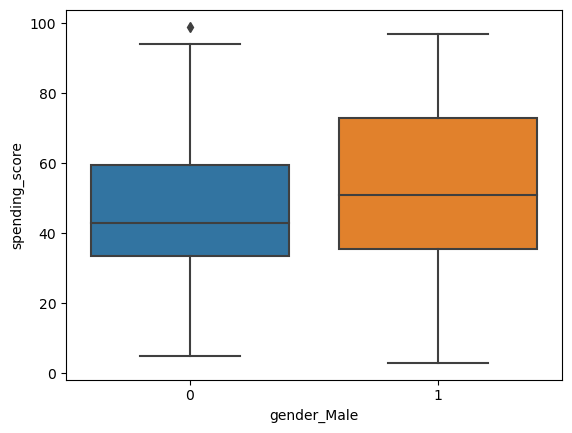

In [38]:
sns.boxplot(data=train, x='gender_Male', y='spending_score')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Median spending score is the same between the genders; there is a slightly higher average spending score for women.

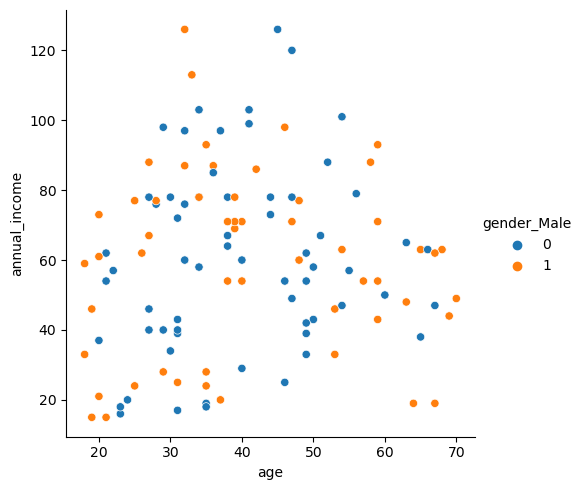

In [39]:
sns.relplot(data=train, x='age', y='annual_income', hue='gender_Male')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Annual income appears to increase slightly with age
    
- Highest earners in the dataset are between 30 and 50 years old

Is there a correlation between annual income and spending score?


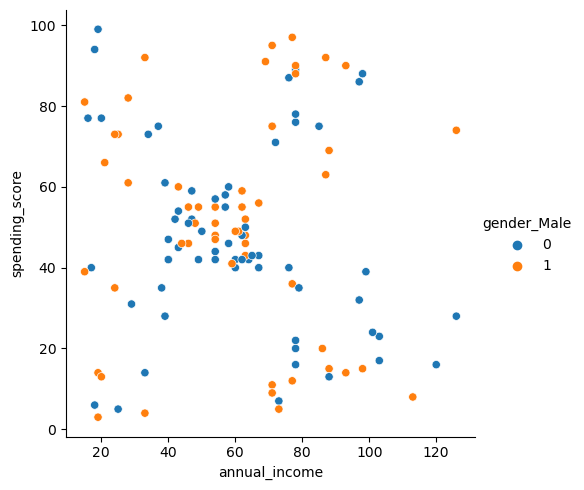

In [40]:
sns.relplot(data=train, x='annual_income', y='spending_score', hue='gender_Male')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Annual income is not able to predict spending score
    
- There are many categories of spenders:
    
    - Low income low spend
    
    - Low income high spend
    
    - Moderate income and spending
    
    - High income low spend
    
    - High income high spend

# Custering with KMeans Modeling

- Easy to use and iterate over

- We determine the number of clusters

- Assumption made that the clusters made will ber circular

- Scale the data; KMeans uses distance

- `.cluster_centers_`, `.interita_` 

In [2]:
mall = wrangle_mall.get_mall_customers()

In [3]:
mall

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
train, validate, test = wrangle_mall.subset_df(mall)

(120, 5) (40, 5) (40, 5)


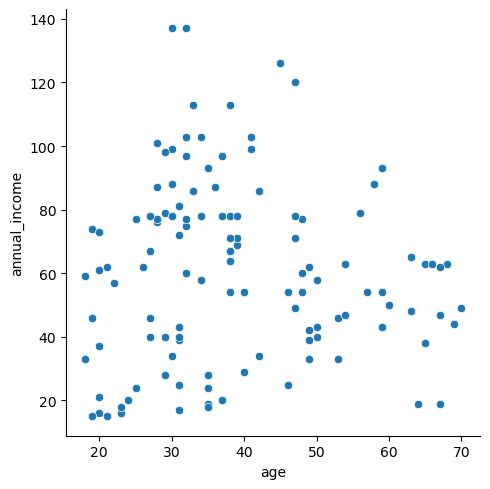

In [6]:
sns.relplot(data=train, x='age', y='annual_income')

In [7]:
X_train = train[['age', 'annual_income']]

In [8]:
seed = 42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X_train)

kmeans.predict(X_train)

array([1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 1, 2, 0, 2], dtype=int32)

In [ ]:
X_train['unscaled_clusters'] = kmeans.predict(X_train)

In [11]:
X_train.head()

,age,annual_income,unscaled_clusters
2,20,16,1
77,40,54,2
46,50,40,2
187,28,101,0
191,32,103,0


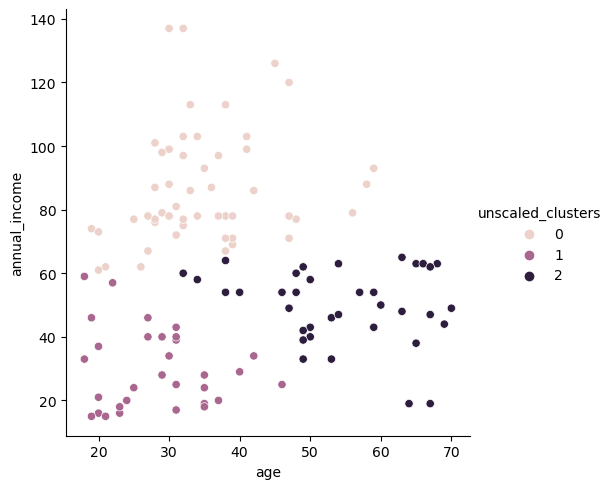

In [15]:
sns.relplot(data=X_train, x='age', y='annual_income', hue='unscaled_clusters')

plt.show()

In [18]:
cols = ['age', 'annual_income']

train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, validate, test, MinMaxScaler(), cols)

In [20]:
train_scaled

,customer_id,gender,age,annual_income,spending_score
2,3,Female,0.038462,0.008197,6
77,78,Male,0.423077,0.319672,48
46,47,Female,0.615385,0.204918,55
187,188,Male,0.192308,0.704918,68
191,192,Female,0.269231,0.721311,69
...,...,...,...,...,...
106,107,Female,0.923077,0.393443,50
14,15,Male,0.365385,0.040984,13
92,93,Male,0.576923,0.368852,49
179,180,Male,0.326923,0.639344,90


In [23]:
mm_scaler = MinMaxScaler()

X_train[['age', 'annual_income']] = mm_scaler.fit_transform(X_train[['age', 'annual_income']])

/var/folders/zk/vf208zwx67vf8nf5b5xtyllw0000gn/T/ipykernel_25123/3881422087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age', 'annual_income']] = mm_scaler.fit_transform(X_train[['age', 'annual_income']])


In [29]:
X_train.head()

,age,annual_income,unscaled_clusters
2,0.038462,0.008197,1
77,0.423077,0.319672,2
46,0.615385,0.204918,2
187,0.192308,0.704918,0
191,0.269231,0.721311,0


In [28]:
X_train = X_train.drop(columns='nannual_income')

In [25]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X_train[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=42)

In [30]:
X_train['scaled_clusters'] = kmeans_scale.predict(X_train[['age', 'annual_income']])

X_train.head()

,age,annual_income,unscaled_clusters,scaled_clusters
2,0.038462,0.008197,1,0
77,0.423077,0.319672,2,0
46,0.615385,0.204918,2,1
187,0.192308,0.704918,0,2
191,0.269231,0.721311,0,2


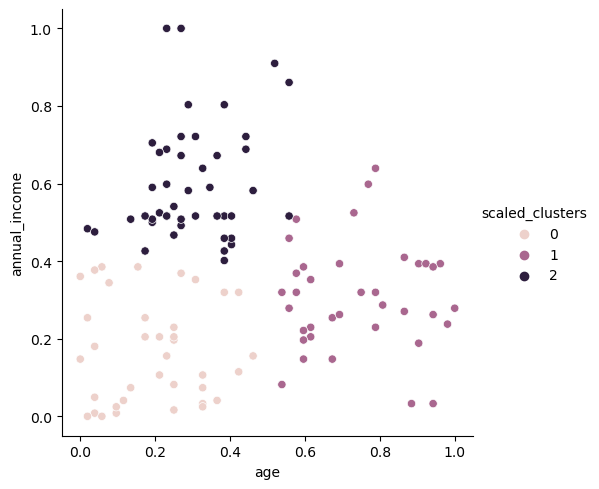

In [33]:
sns.relplot(data=X_train, x='age', y='annual_income', hue='scaled_clusters')

plt.show()

In [34]:
kmeans_scale.cluster_centers_

array([[0.19386694, 0.16770049],
       [0.74595142, 0.30845557],
       [0.29871795, 0.5996357 ]])

In [38]:
kmeans_scale.inertia_

4.444853535058135

In [46]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X_train[['age', 'annual_income']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[15.047813419172702,
 8.417549176402046,
 4.444853535058135,
 3.4713398996741356,
 2.671371039753449,
 2.25325910825336,
 1.9666830687933925,
 1.6202132458460659,
 1.3988737078521436,
 1.292127784356667]

In [49]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

results_df

,n_clusters,inertia
0,1,15.047813
1,2,8.417549
2,3,4.444854
3,4,3.471340
4,5,2.671371
5,6,2.253259
6,7,1.966683
7,8,1.620213
8,9,1.398874
9,10,1.292128


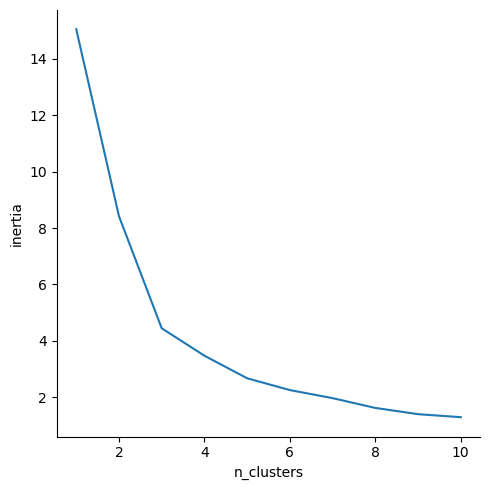

In [52]:
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')

plt.show()

In [62]:
X_train

,age,annual_income,unscaled_clusters,scaled_clusters
2,0.038462,0.008197,1,0
77,0.423077,0.319672,2,0
46,0.615385,0.204918,2,1
187,0.192308,0.704918,0,2
191,0.269231,0.721311,0,2
...,...,...,...,...
106,0.923077,0.393443,2,1
14,0.365385,0.040984,1,0
92,0.576923,0.368852,2,1
179,0.326923,0.639344,0,2


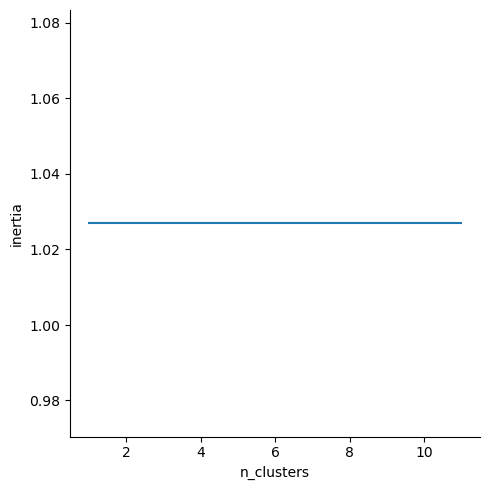

,n_clusters,inertia
0,1,1.026921
1,2,1.026921
2,3,1.026921
3,4,1.026921
4,5,1.026921
5,6,1.026921
6,7,1.026921
7,8,1.026921
8,9,1.026921
9,10,1.026921


In [63]:
cols = ['age', 'annual_income']

inertial_dampening(X_train, 12, cols)